In [149]:
import numpy as np 
import pywt
from scipy.misc import (imshow, imread)
from matplotlib.gridspec import GridSpec

%matplotlib inline

%run helpers.py

### Run code below to load needed files

for name in ['Barb', 'Bird', 'Boat', 'Bridge', 'Crosses',\
 'Goldhill','Horiz','Lena','Mandrill','Peppers','Slope',\
 'Squares','Text','Washsat','Zelda']:
  !wget http://www.math.uni.wroc.pl/~mpal/academic/2012/Datasets/{name}.gif

!mkdir data
!mv *.gif data 

## Darken/lighten

In [159]:
lena = imread('data/Lena.gif')
lena_lighter = (lena.astype(np.double) * 1.2).clip(0, 255)
lena_darker = (lena.astype(np.double) / 1.2).clip(0, 255)

lenas = [lena_lighter, lena, lena_darker]

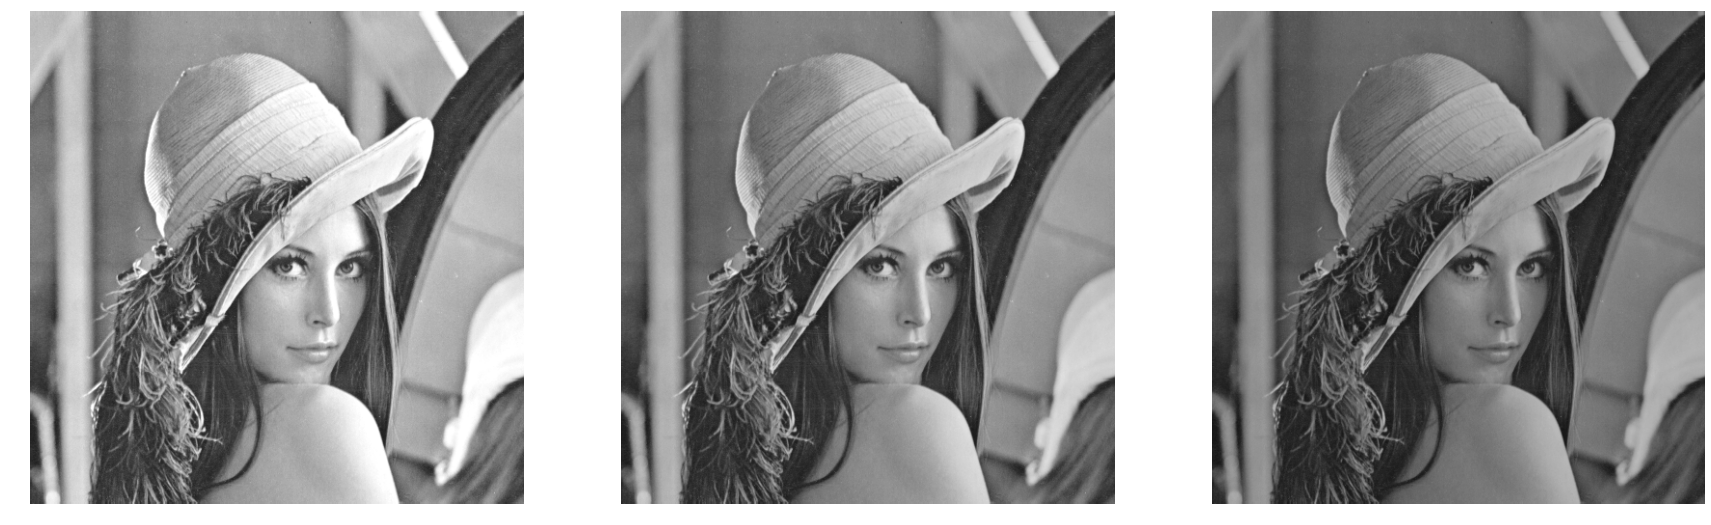

In [160]:
plt.figure(figsize=(30,10))
for i in range(len(lenas)):
  plt.subplot(131 + i)
  plt.imshow(lenas[i], cmap='gray', vmax = 255, vmin = 0)
  plt.axis('off')
  
plt.show()

## Wavelets

In [153]:
w = pywt.Wavelet('sym3')
(cA, (cH, cV, cD)) = pywt.dwt2(lena, wavelet=w, mode='periodization')

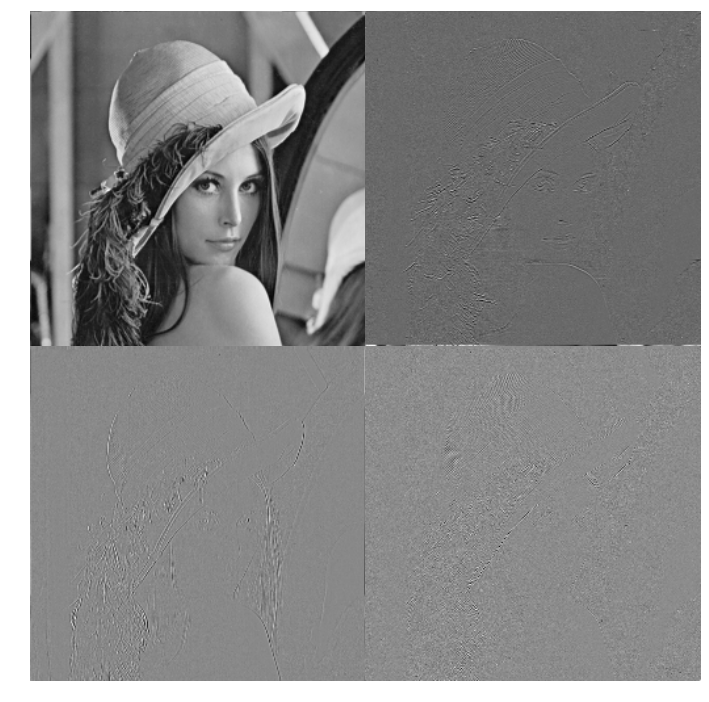

In [154]:
imgs = [cA, cH, cV, cD]

plt.figure(figsize=(12,12))
plot_wavelet_approximations(imgs)